## Deep learning vs Symbolic sonification Harvard classification analysis
Total:40 participants. 2BLV. Balanced final sample: 38 Participants / 16 experienced vs 16 randomly sampled non-experienced (May, 2025)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as scistats

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import csv

In [2]:
import astropy
from astropy import stats

In [3]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [4]:
data = pd.read_csv("/Users/adrian/Documents/CoRoT-ICAD2024/Evaluation/corot_data_clean.csv", delimiter=';')
data

,ID,Start time,Completion time,Email,Name,Language,Vídeo de entrenamiento I. Conversión del tipo de espectro a notas musicales,Vídeo de entrenamiento II. Sonificación mediante inteligencia artificial.,Q3,Q4,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Puedes añadir aquí cualquier comentario o sugerencia:,Unnamed: 25
0,0,NaN,NaN,RESULTS,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,NaN,NaN,NaN,NaN,NaN,Sí,Sí,NaN,NaN,NaN
1,1,3/13/24 12:57:24,3/13/24 13:05:09,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,Sí,Sí,España,NaN,NaN
2,2,3/13/24 16:59:23,3/13/24 17:13:42,anonymous,NaN,NaN,NaN,NaN,"""K"" <=> ""D"" = Re","""O"" <=> ""C"" = Do",...,Interés en noticias y documentales de Astronomía,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
3,3,3/13/24 17:37:19,3/13/24 17:43:03,anonymous,NaN,NaN,NaN,NaN,"""O"" <=> ""C"" = Do","""G"" <=> ""G"" = Sol",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Entre 45 y 54,No,No,España,NaN,NaN
4,4,3/13/24 17:29:31,3/13/24 17:46:40,anonymous,NaN,NaN,NaN,NaN,"""A"" <=> ""A"" = La","""K"" <=> ""D"" = Re",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
5,5,3/14/24 21:25:08,3/14/24 21:33:09,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""K"" <=> ""D"" = Re","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Más de 65,Sí,Sí,España,NaN,NaN
6,6,3/14/24 22:39:42,3/14/24 22:46:18,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""F"" <=> ""F"" = Fa","""O"" <=> ""C"" = Do",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN
7,7,3/16/24 0:27:07,3/16/24 0:38:02,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""F"" <=> ""F"" = Fa",...,Ninguna,Oyente,Pérdida leve de visión con diagnostico médico,Pérdida leve de audición con diagnóstico médico,Entre 25 y 34,Sí,Sí,España,NaN,NaN
8,8,3/16/24 16:39:19,3/16/24 16:47:28,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""B"" <=> ""B"" = Si","""B"" <=> ""B"" = Si",...,Ninguna,Oyente,Ninguno,Ninguno,Entre 55 y 64,Sí,No,España,NaN,NaN
9,9,3/17/24 20:57:53,3/17/24 21:05:32,anonymous,NaN,"Español (España, alfabetización internacional)",NaN,NaN,"""A"" <=> ""A"" = La","""O"" <=> ""C"" = Do",...,Ninguna,Ninguna,Pérdida leve de visión con diagnostico médico,Ninguno,Más de 65,Sí,No,España,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   ID                                                                           39 non-null     int64  
 1   Start time                                                                   38 non-null     object 
 2   Completion time                                                              38 non-null     object 
 3   Email                                                                        39 non-null     object 
 4   Name                                                                         0 non-null      float64
 5   Language                                                                     34 non-null     object 
 6   Vídeo de entrenamiento I. Conversión del tip

In [6]:
#deep learning grades
grades = []
for i in range(1,len(data)):
    grade = 0
    if (data.Q7[i][1] == data.Q7[0][1]):
        grade += 1
    if (data.Q8[i][1] == data.Q8[0][1]):
        grade += 1    
    if (data.Q9[i][1] == data.Q9[0][1]):
        grade += 1
    if (data.Q10[i][1] == data.Q10[0][1]):
        grade += 1    
    grades.append(grade/4)
mode = scistats.mode(grades)
print("DL grades:", grades)    
print("DL mean:", np.mean(grades))
print("DL median:", np.median(grades))
print("DL most frequent result:", mode)

DL grades: [0.5, 0.25, 0.25, 0.25, 0.5, 0.0, 0.75, 0.25, 0.25, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.75, 0.75, 0.0, 1.0, 0.25, 0.25, 0.5, 0.5, 1.0, 0.5, 0.0, 0.75, 0.5, 0.25, 0.75, 0.25, 0.5, 0.0, 0.75, 0.0, 0.5, 0.5, 0.25]
DL mean: 0.40789473684210525
DL median: 0.5
DL most frequent result: ModeResult(mode=array([0.5]), count=array([13]))


In [7]:
#symbolic grades
symbol_grades = []
for i in range(1,len(data)):
    grade = 0
    if (data.Q3[i][1] == data.Q3[0][1]):
        grade += 1
    if (data.Q4[i][1] == data.Q4[0][1]):
        grade += 1    
    if (data.Q5[i][1] == data.Q5[0][1]):
        grade += 1
    if (data.Q6[i][1] == data.Q6[0][1]):
        grade += 1    
    symbol_grades.append(grade/4)
mode = scistats.mode(symbol_grades)
print("Symbolic grades:", symbol_grades)    
print("Symbolic mean:", np.mean(symbol_grades))
print("Symbolic median:", np.median(symbol_grades))
print("Symbolic Most frequent result:", mode)

Symbolic grades: [1.0, 0.0, 0.25, 0.5, 0.0, 0.0, 0.5, 0.0, 0.25, 0.5, 0.0, 1.0, 0.0, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.75, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.75, 0.75, 0.5, 0.75, 1.0, 1.0, 0.5, 1.0, 0.75, 0.75, 1.0, 0.5]
Symbolic mean: 0.5723684210526315
Symbolic median: 0.5
Symbolic Most frequent result: ModeResult(mode=array([1.]), count=array([11]))


In [8]:
samples = len(data)
symbol = pd.Series(symbol_grades)
symbol.describe()

count    38.000000
mean      0.572368
std       0.362554
min       0.000000
25%       0.250000
50%       0.500000
75%       1.000000
max       1.000000
dtype: float64

In [9]:
dl = pd.Series(grades)
dl.describe()

count    38.000000
mean      0.407895
std       0.281292
min       0.000000
25%       0.250000
50%       0.500000
75%       0.500000
max       1.000000
dtype: float64

In [10]:
dl_success = np.sum(grades)
dl_attempts = dl.describe()["count"]
conf_dl = astropy.stats.binom_conf_interval(dl_success, dl_attempts, confidence_level=0.68269, interval='jeffreys')
print(conf_dl) # Correct answers interval

[0.31916845 0.47575884]


In [11]:
symbolic_success = np.sum(symbol_grades)
symbolic_attempts = symbol.describe()["count"]
conf_symbolic = astropy.stats.binom_conf_interval(symbolic_success, symbolic_attempts, confidence_level=0.68269, interval='jeffreys')
print(conf_symbolic) # Correct answers interval

[0.47164767 0.63088882]


In [13]:
column_list = ["Deep learning", "Symbolic"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []

In [14]:
participants_list.append(dl.describe()["count"])
success_list.append(dl.describe()["mean"])
Jeff_low_list.append(conf_dl[0])
Jeff_high_list.append(conf_dl[1])
std_list.append(dl.describe()["std"])

In [15]:
participants_list.append(symbol.describe()["count"])
success_list.append(symbol.describe()["mean"])
Jeff_low_list.append(conf_symbolic[0])
Jeff_high_list.append(conf_symbolic[1])
std_list.append(symbol.describe()["std"])

In [16]:
with open("DlvsSymbolic-Thesis.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "conf_lo", "conf_hi", "Std"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i]])

In [17]:
plot_data = pd.read_csv("DlvsSymbolic-Thesis.csv", delimiter=',')
plot_data

,Group,Participants,Success,conf_lo,conf_hi,Std
0,Deep learning,38.0,0.407895,0.319168,0.475759,0.281292
1,Symbolic,38.0,0.572368,0.471648,0.630889,0.362554


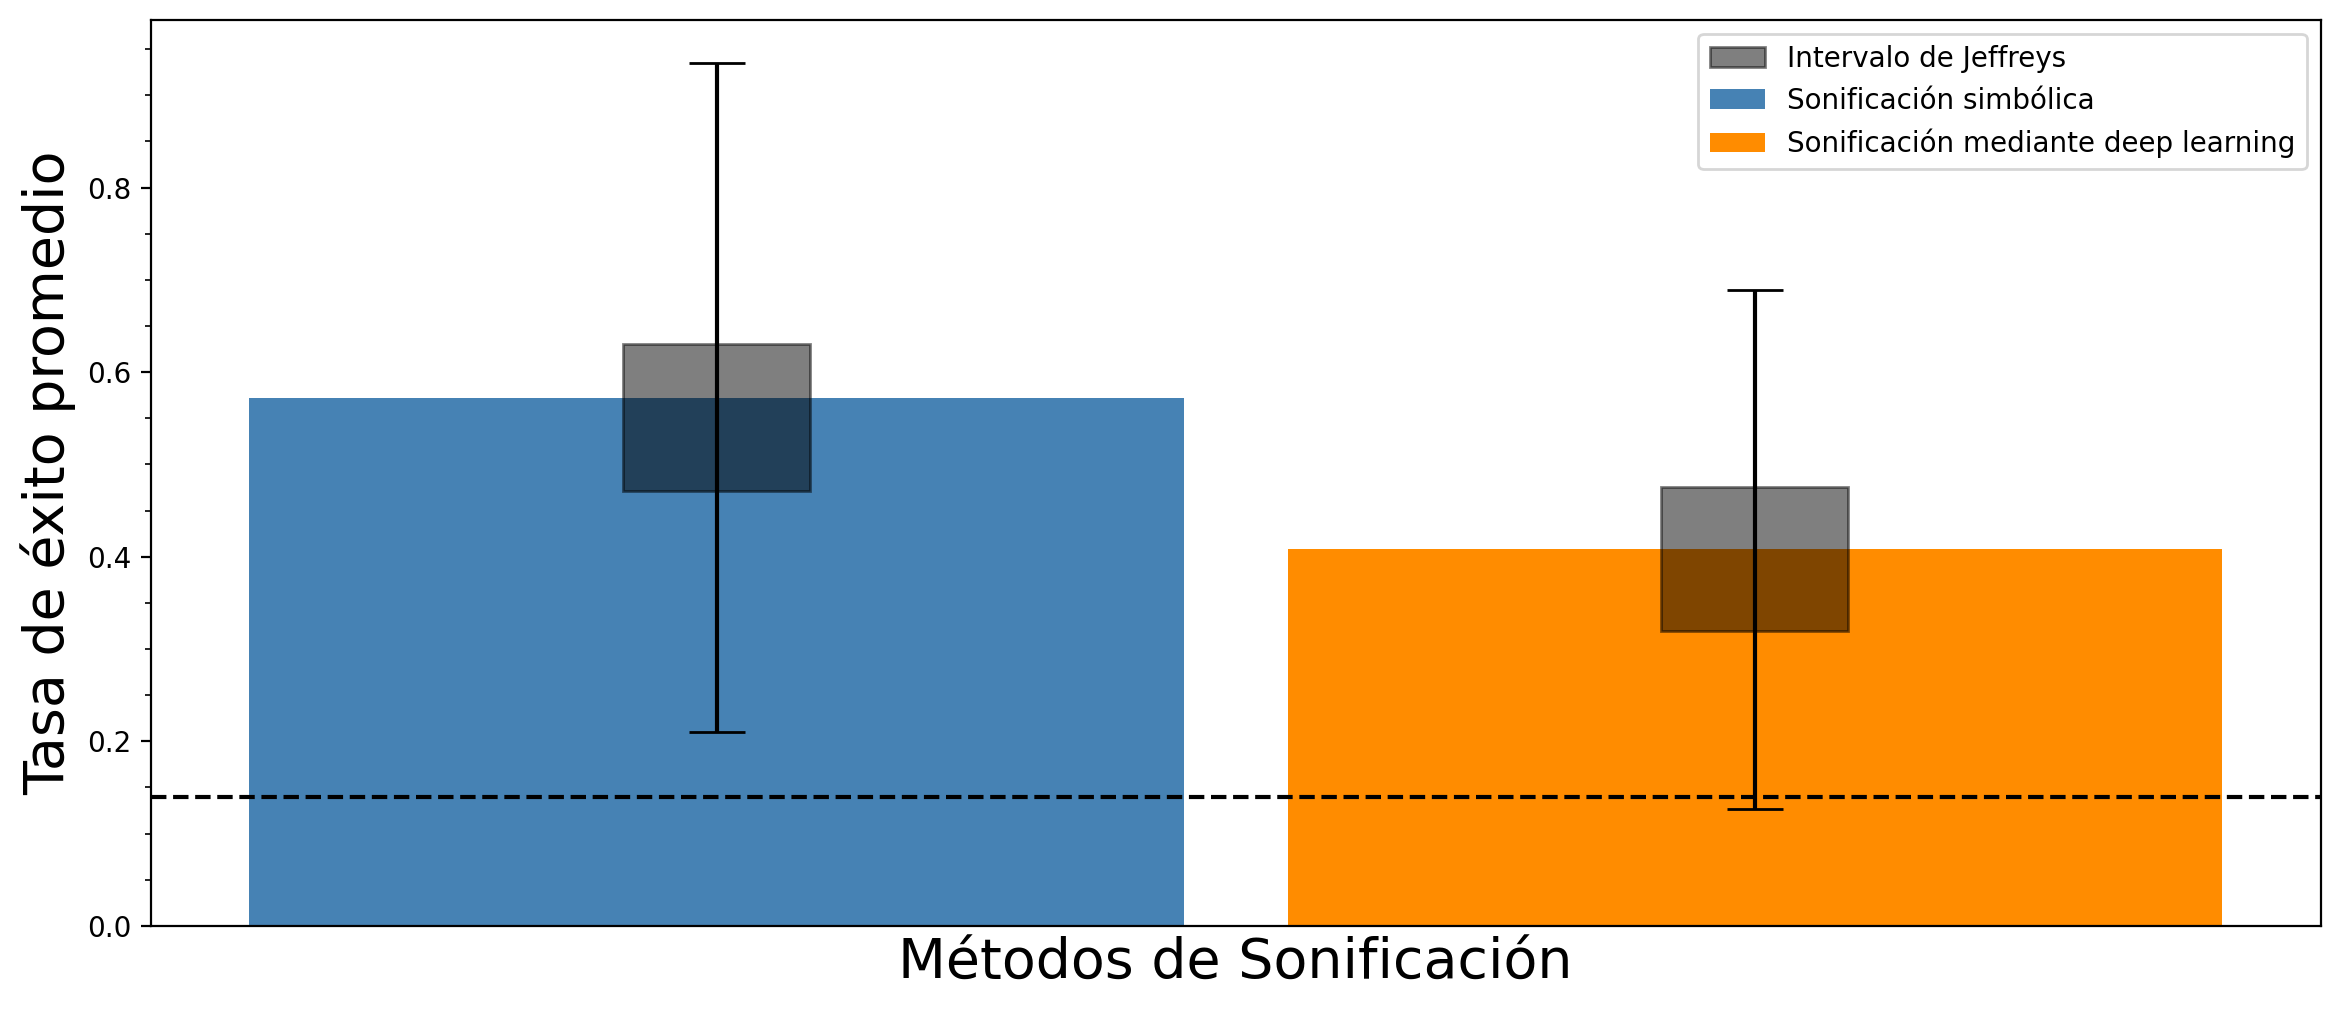

In [18]:
labels = ['Deep learning', 'Symbolic sonification']

fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))

bar_width = .9

rects1 = ax.bar(1 - bar_width/2, plot_data['Success'][1] , bar_width, yerr=plot_data['Std'][1], 
                label='Sonificación simbólica',align='center', color = 'steelblue', ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, plot_data['Success'][0] , bar_width, yerr=plot_data['Std'][0], 
                label='Sonificación mediante deep learning',align='center', color = 'darkorange', ecolor='black',capsize=10)
ax.set_ylabel('Tasa de éxito promedio',size=20)
ax.set_xlabel('Métodos de Sonificación',size=20)

ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, plot_data['conf_lo'][1]), 
                       0.18, plot_data['conf_hi'][1]-plot_data['conf_lo'][1],
                       alpha=0.5,color='black',label="Intervalo de Jeffreys"))
ax.add_patch(Rectangle((1.46, plot_data['conf_lo'][0]), 
                       0.18, plot_data['conf_hi'][0]-plot_data['conf_lo'][0],
                       alpha=0.5,color='black'))

ax.set_xticks([])
ax.set_xticklabels([])

plt.axhline(y=.14, color='black', linestyle='--')


ax.legend(fontsize=10,loc='upper right')
plt.savefig('DeepLearningVsSymbolic-THESIS.png')
plt.show()

In [19]:
#Kruskal-Wallis test: kruskal_p_value < 0.05 => reject the null hypothesis => statistical significance
H_statistic, kruskal_p_value = scistats.kruskal(grades, symbol_grades)
 
print(H_statistic, kruskal_p_value)

4.387107908377441 0.036211689240834774


Conclusion: The differences found in the results using different sonification methods have statistical significance

In [20]:
groups = []

for i in range(len(grades)):
    groups.append("Deep learning")
for i in range(len(grades)):
    groups.append("Symbolic")

[0.5, 0.25, 0.25, 0.25, 0.5, 0.0, 0.75, 0.25, 0.25, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.75, 0.75, 0.0, 1.0, 0.25, 0.25, 0.5, 0.5, 1.0, 0.5, 0.0, 0.75, 0.5, 0.25, 0.75, 0.25, 0.5, 0.0, 0.75, 0.0, 0.5, 0.5, 0.25, 1.0, 0.0, 0.25, 0.5, 0.0, 0.0, 0.5, 0.0, 0.25, 0.5, 0.0, 1.0, 0.0, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.75, 0.25, 0.25, 0.5, 1.0, 0.25, 0.25, 0.75, 0.75, 0.5, 0.75, 1.0, 1.0, 0.5, 1.0, 0.75, 0.75, 1.0, 0.5]


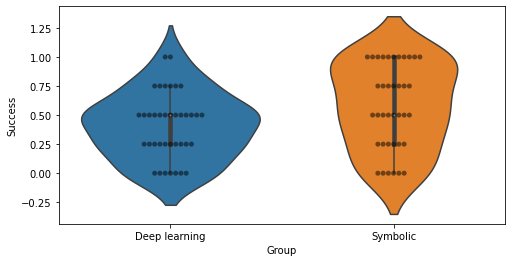

In [21]:
success = grades + symbol_grades
print(success)
dataInfStats = pd.DataFrame({'Group': groups, 'Success':success})

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(x="Group", y="Success", data=dataInfStats, ax=ax)
sns.swarmplot(x="Group", y="Success", data=dataInfStats, color='black', alpha = 0.5, ax=ax);

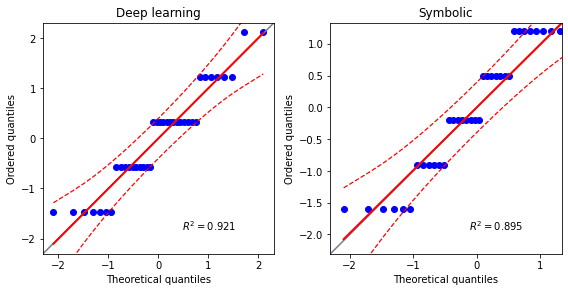

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8, 7))
pg.qqplot(dataInfStats.loc[dataInfStats.Group=='Deep learning', 'Success'], dist='norm', ax=axs[0])
axs[0].set_title('Deep learning')
pg.qqplot(dataInfStats.loc[dataInfStats.Group=='Symbolic', 'Success'], dist='norm', ax=axs[1])
axs[1].set_title('Symbolic')

plt.tight_layout()


In [23]:
pg.anova(data=dataInfStats, dv='Success', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,0.513980,1,0.513980,4.881782,0.030236,0.061887
1,Within,7.791118,74,0.105285,NaN,NaN,NaN


In [24]:
pg.pairwise_tukey(data=dataInfStats, dv='Success', between='Group').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Deep learning,Symbolic,0.408,0.572,-0.164,0.074,-2.209,0.03,-0.502


# Comparative

In [25]:
symbol = pd.read_csv("/Users/adrian/Documents/CoRoT-ICAD2024/Evaluation/Symbolic-stats-Thesis.csv", delimiter=',')
symbol

,Group,Participants,Success,conf_lo,conf_hi,Std,Useful,More
0,Global,38,0.572368,0.531896,0.611893,0.146323,90.000000,72.500000
1,Experienced,16,0.781250,0.725496,0.828293,0.194320,87.500000,81.250000
2,Non-experienced,16,0.484375,0.422631,0.546602,0.106739,87.500000,62.500000
3,AstroNonMus,3,0.583333,0.439988,0.713469,0.419435,66.666667,33.333333
4,MusNonAstro,4,0.937500,0.848136,0.973868,0.125000,100.000000,75.000000
5,Astromus,4,0.812500,0.697752,0.889565,0.239357,75.000000,100.000000
6,Nothing,4,0.500000,0.378786,0.621214,0.288675,75.000000,50.000000
7,BLV,2,0.250000,0.132867,0.425155,0.288675,100.000000,100.000000
8,Non-BLV,2,0.625000,0.448942,0.772074,0.250000,0.000000,50.000000


In [26]:
deep = pd.read_csv("Harvard-stats-Thesis.csv", delimiter=',')
deep

,Group,Participants,Success,conf_lo,conf_hi,Std
0,Global,38,0.407895,0.368765,0.448232,0.033974
1,Experienced,16,0.484375,0.422631,0.546602,0.106739
2,Non-experienced,16,0.390625,0.331789,0.452848,0.078644
3,AstroNonMus,3,0.083333,0.034878,0.198173,0.166667
4,MusNonAstro,4,0.687500,0.563454,0.788964,0.239357
5,Astromus,4,0.500000,0.378786,0.621214,0.204124
6,Nothing,4,0.437500,0.320959,0.561565,0.125000
7,BLV,2,0.250000,0.132867,0.425155,0.288675
8,Non-BLV,2,0.500000,0.333603,0.666397,0.408248


In [27]:
results_1 = round(symbol["Success"],2)
results_2 = round(deep["Success"],2)

In [28]:
results_1

0    0.57
1    0.78
2    0.48
3    0.58
4    0.94
5    0.81
6    0.50
7    0.25
8    0.62
Name: Success, dtype: float64

In [29]:
results_2

0    0.41
1    0.48
2    0.39
3    0.08
4    0.69
5    0.50
6    0.44
7    0.25
8    0.50
Name: Success, dtype: float64

In [52]:
np.array(results_1)

array([0.57, 0.78, 0.48, 0.58, 0.94, 0.81, 0.5 , 0.25, 0.62])

In [53]:
np.array(results_2)

array([0.41, 0.48, 0.39, 0.08, 0.69, 0.5 , 0.44, 0.25, 0.5 ])

In [51]:
from scipy.stats import shapiro

# Test normality for each group. p-value<0.05 =>not normally distributed
stat1, p0 = shapiro(results_1)
stat1, p1 = shapiro(results_2)

print(f"symbolic normality: p={p0}")
print(f"deep learning normality: p={p1}")

symbolic normality: p=0.8989079594612122
deep learning normality: p=0.5240183472633362


In [56]:
# T-test
stat, p_value = ttest_ind(results_1, results_2, equal_var=False)
print(stat, p_value)

2.227817848415908 0.04109676357873039


In [58]:
# Cohen's d for Effect Size (T-test). Meaninful: Small effect size d=0.2, medium d=0.5, large d=0.8.

# Calculate means and standard deviations
mean1 = np.mean(results_1)
mean2 = np.mean(results_2)
std1 = np.std(results_1, ddof=1)
std2 = np.std(results_2, ddof=1)

# Calculate Cohen's d
cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
print("Cohen's d:", cohen_d)

Cohen's d: 1.0502034052422085


In [30]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

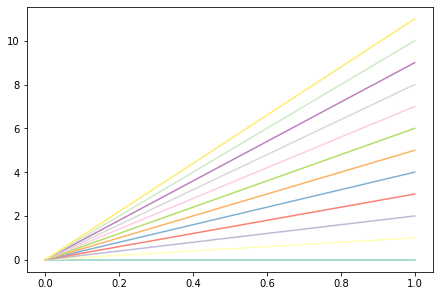

In [31]:
colors = plt.colormaps['Set3'].colors

fig, ax = plt.subplots(layout='constrained')

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()

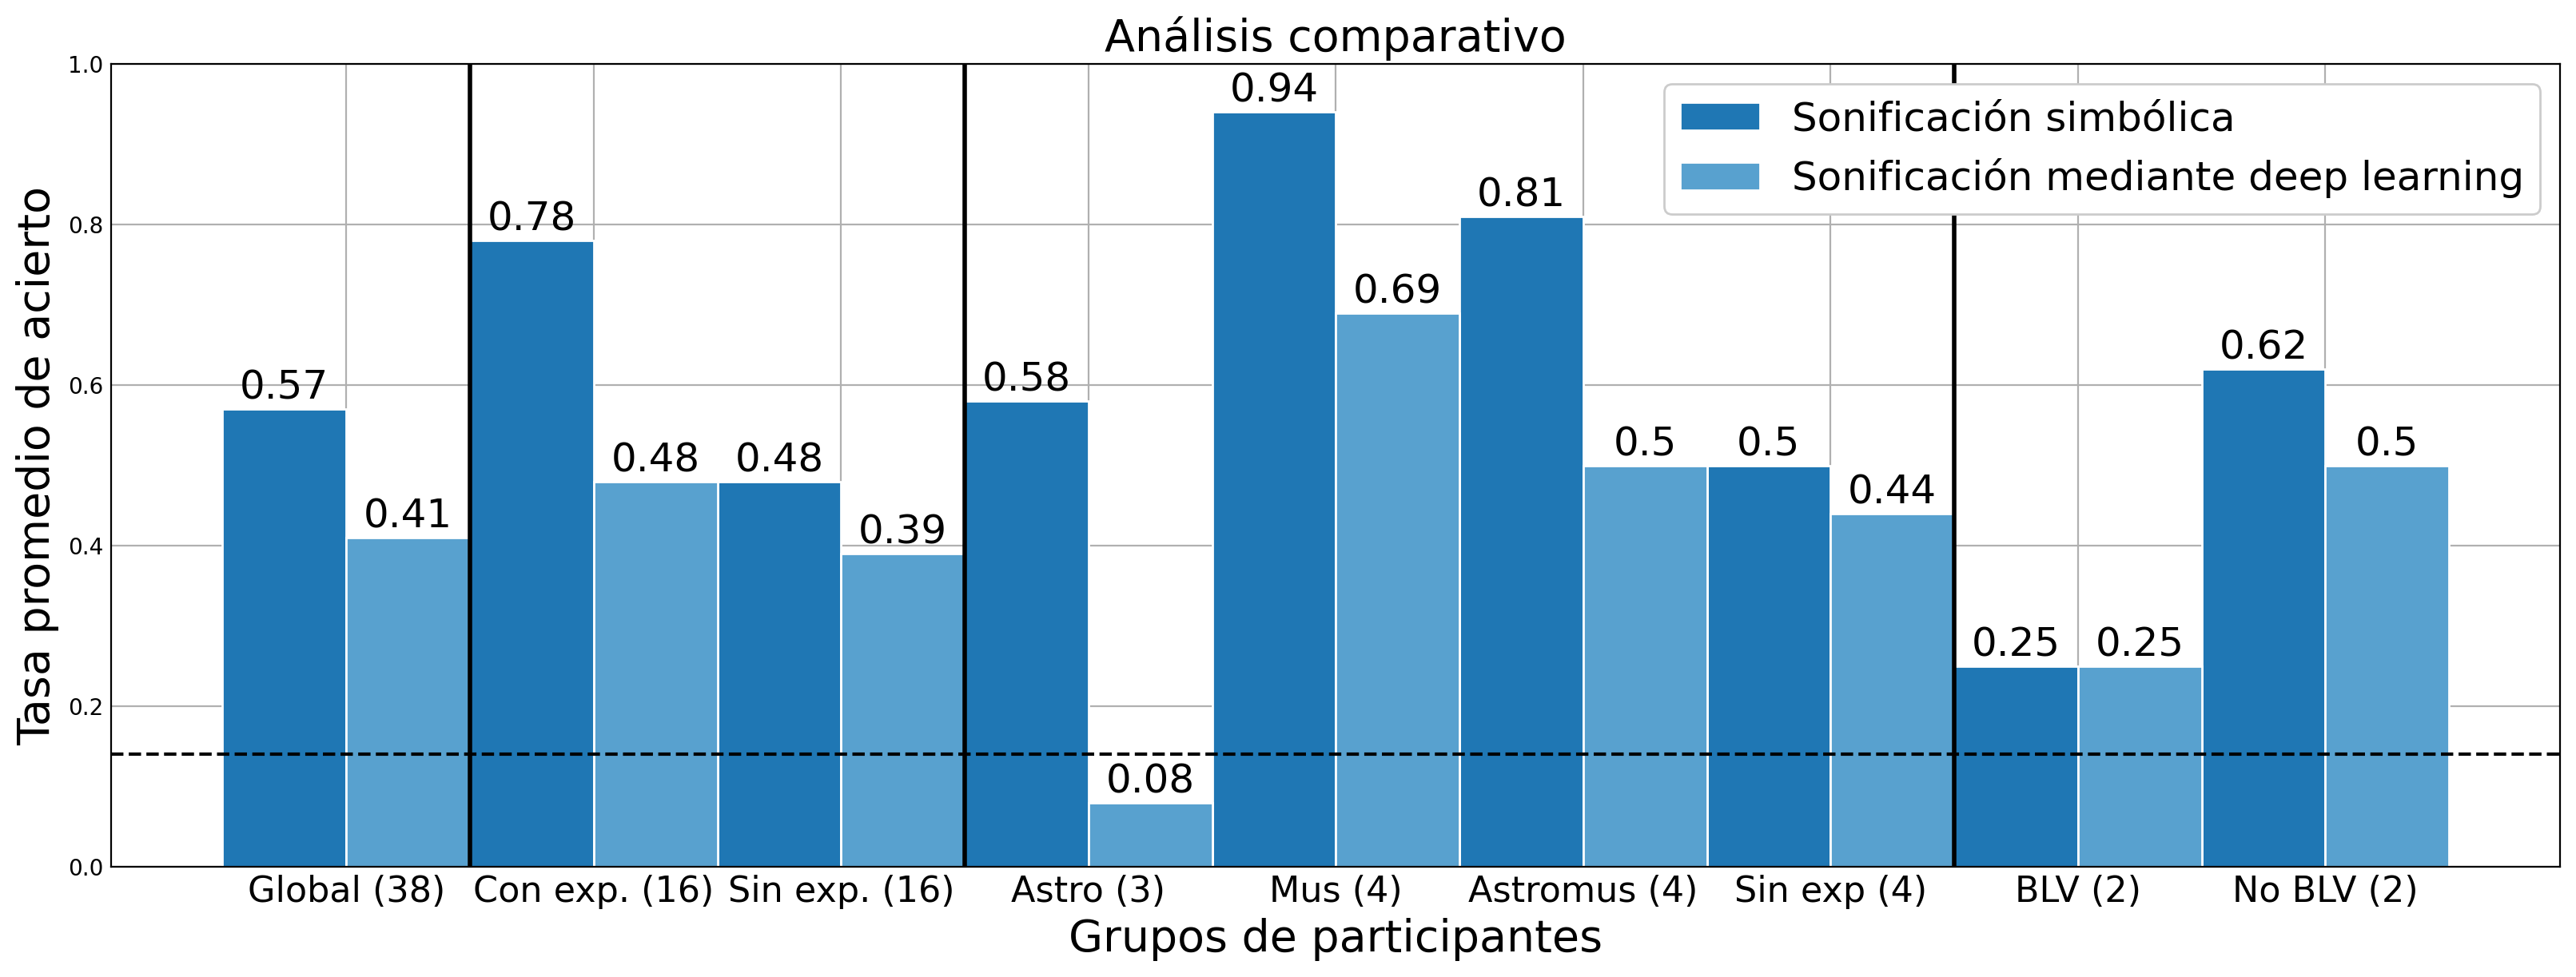

In [59]:
plt.style.use('_mpl-gallery')

participants = ['Global (38)', 'Con exp. (16)', 'Sin exp. (16)', 'Astro (3)', 'Mus (4)', 'Astromus (4)','Sin exp (4)', 'BLV (2)', 'No BLV (2)']
labels = ['Sonificación simbólica', 'Sonificación mediante deep learning']

results = {
    'Sonificación simbólica': results_1,
    'Sonificación mediante deep learning': results_2,
}

measurement = results['Sonificación simbólica']

x = np.arange(len(participants))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0
offset = 1
fig, ax = plt.subplots(figsize=(16,6),dpi=200, layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, edgecolor="white", label=attribute)
    ax.bar_label(rects, padding=1, fontsize = 18)
    multiplier += 1
    i +=1
    
  
ax.set_ylabel('Tasa promedio de acierto', fontsize = 20)
ax.set_xlabel('Grupos de participantes', fontsize = 20)
ax.set_title('Análisis comparativo', fontsize = 20)
ax.set_xticks(x + 2* width -0.75, participants, fontsize = 16)
ax.legend(loc='upper right', ncols=1, fontsize = 18, framealpha=1)
ax.set_ylim(0, 1)

ax.axvline(x=.75, color='black', linestyle='-', linewidth=2)
ax.axvline(x=2.75, color='black', linestyle='-', linewidth=2)
ax.axvline(x=6.75, color='black', linestyle='-', linewidth=2)

plt.axhline(y=.14, color='black', linestyle='--')

plt.savefig('Symbol-Deep-Comparative-THESIS.png')
plt.show()

In [33]:
for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, edgecolor="white", label=attribute, color=colors[i-9])
    ax.bar_label(rects, padding=1, fontsize = 18)
    multiplier += 1
    i +=1
    
  

In [34]:
for attribute, measurement in results.items():
    print(attribute)
    print(measurement)
    print('-'*30)

Sonificación simbólica
0    0.57
1    0.78
2    0.48
3    0.58
4    0.94
5    0.81
6    0.50
7    0.25
8    0.62
Name: Success, dtype: float64
------------------------------
Sonificación mediante deep learning
0    0.41
1    0.48
2    0.39
3    0.08
4    0.69
5    0.50
6    0.44
7    0.25
8    0.50
Name: Success, dtype: float64
------------------------------


In [35]:
# Kruskal-Wallis test: kruskal_p_value < 0.05 => reject the null hypothesis => statistical significance
H_statistic, kruskal_p_value = scistats.kruskal(results_1, results_2)
print(H_statistic, kruskal_p_value)

4.709472712587968 0.029996850849985233


In [38]:
# Cohen's d for Effect Size (T-test). Meaninful: Small effect size d=0.2, medium d=0.5, large d=0.8.

# Calculate means and standard deviations
mean1 = np.mean(results_1)
mean2 = np.mean(results_2)
std1 = np.std(results_1, ddof=1)
std2 = np.std(results_2, ddof=1)

# Calculate Cohen's d
cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
print("Cohen's d:", cohen_d)

Cohen's d: 1.0502034052422085
